<img src="magpie_logo.png" alt= “magpie_logo” width="100" align="right">

## **MAGPIE: an interactive tool for visualizing and analyzing many simultaneous protein interactions with a binding partner**

**What is this tool?**
MAGPIE generates 3D visualizations for sets of protein binders interacting with one target ligand (which can be a protein or a small molecule). It also produces sequence logo-style amino acid (AA) frequency graphs. In the AA frequency graphs, the user chooses target ligand positions on the fly, and the size of each binder AA is based on the frequency that it appears in the protein complex dataset within a user-defined distance from the chosen target ligand position(s). The distance is calculated using the alpha carbon positions between protein interfaces, or all heavy atoms in the case of ligands. MAGPIE's 3D visualizer plots the entire target structure, and highlights the residues within a specified distance constraint. There are two options for coloring the interacting residues based on [Amino colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#aminocolours) and [Shapely colour](http://acces.ens-lyon.fr/biotic/rastop/help/colour.htm#shapelycolours). If you don't mind that your data is semi-public, or have <1000 input PDB files, it may be more convenient to compute on the cloud with [the Google CoLab version](https://colab.research.google.com/github/glasgowlab/MAGPIE/blob/GoogleColab/MAGPIE_COLAB.ipynb).

**Required Inputs:**
- PDB files: these should be aligned on the target ligands. Two examples are provided on GitHub, one for protein-protein interactions and one for small molecule-protein interactions.
- Target chain ID from PDB: the program uses the first file in the directory to upload the target ligand structure.
- Protein binder chain ID from PDB: this chain identifier must be the same across all PDB files.
- Target type: indicate whether the target ligand is a small molecule or a protein.
- Target residue index (for protein ligands) or unique atom names (for small molecule ligands): provide the target residue indices for proteins or unique atom names for small molecules. Alternatively, you can input 'all' to consider all AAs/heavy atoms.

**Usage:**
Please execute the cells in numerical order. If you wish to load a different dataset, start from the upload step to reload the new data.


## **1. Run required packages, then upload and process data  ↓**

Run the next cell to input the path to your directory containing all the input PDB files.

Type either **'Protein Example'** or **'Ligand Example'** to run the example datasets.

In [1]:
import sequence_logo_main
import glob

pdb_files = input("Enter path to files: ")
pdb_files = glob.glob(f"{pdb_files}/*.pdb")
print(pdb_files)

['Small molecule example/reference_11/1ixe_cleanedreference_11.pdb', 'Small molecule example/reference_11/1n8w_cleanedreference_11.pdb', 'Small molecule example/reference_11/2cts_cleanedreference_11.pdb', 'Small molecule example/reference_11/2gq3_cleanedreference_11.pdb', 'Small molecule example/reference_11/2req_cleanedreference_11.pdb', 'Small molecule example/reference_11/3cts_cleanedreference_11.pdb', 'Small molecule example/reference_11/3fsb_cleanedreference_11.pdb', 'Small molecule example/reference_11/3pvy_cleanedreference_11.pdb', 'Small molecule example/reference_11/3rq5_cleanedreference_11.pdb', 'Small molecule example/reference_11/3vbk_cleanedreference_11.pdb', 'Small molecule example/reference_11/3vbm_cleanedreference_11.pdb', 'Small molecule example/reference_11/4l9z_cleanedreference_11.pdb', 'Small molecule example/reference_11/5vxc_cleanedreference_11.pdb', 'Small molecule example/reference_11/6as5_cleanedreference_11.pdb', 'Small molecule example/reference_11/6boo_clean

# 2. Select target ligand and protein binder chains.
Select target ligand and protein binder chains, decide whether the target ligand is a ligand or protein, provide heavy atom names (if small molecule ligand) or residue index (if protein ligand) to plot around, and provide the distance in Ångstroms to graph from the target chain.

You can also type 'all' to plot all residues or atoms.

**Example usage:**
- For Protein example, use A for the target ligand chain and C for the protein binder chain.
- For Small-molecule example, use X for the target chain and A for the protein binder chain. Check the is_ligand option. Small-molecule Conformers is the same data set as Small-molecule Example, and is the output of small_align_molecule.py using a RMSD threshold of 2.





In [15]:
target_chain = input("Target chain: ")
binding_chain = input("Binding chain: ")
is_ligand = input("Is small-molecule ligand?: ('True' or 'False'): ")
distance = int(input("How many Å from target to graph?: " ))
download_meta =input("Save meta data?: ('True' or 'False')")
if is_ligand == "True":
    is_ligand = True
else:
    is_ligand = False
if download_meta == "True":
    download_meta== True
else: 
    download_meta == False
eps = 2
min_samples = 15
thread_n = 1 

# 3.1 Advance Options 

# Clustering 

MAGPIE uses [DBSCAN](https://www.dbs.ifi.lmu.de/Publikationen/Papers/KDD-96.final.frame.pdf) to cluster points in 3d without requiring to specify the number of desired clusters. 

Run the folliwng cell if you are interested in changing:

 - eps: "The maximum distance between two samples for one to be considered as in the neighborhood of the other." 

  - min_samples: "The number of samples (or total weight) in a neighborhood for a point to be considered as a core point."[1](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
 

Default is eps = 2, min_samples = 15



In [2]:
eps = float(input("New eps: "))
min_samples = int(input("New min_sanmples"))


# Multithreading 

MAGPIE uses multiprocessing to multithread using CPUs, unless you run the following cell, MAGPIE will use 1 thread. 

In [22]:
thread_n = int(input("Number of threads to use: "))


## 3.2 Plot points in 3D viewer.

Small molecule example/reference_11/1ixe_cleanedreference_11.pdb


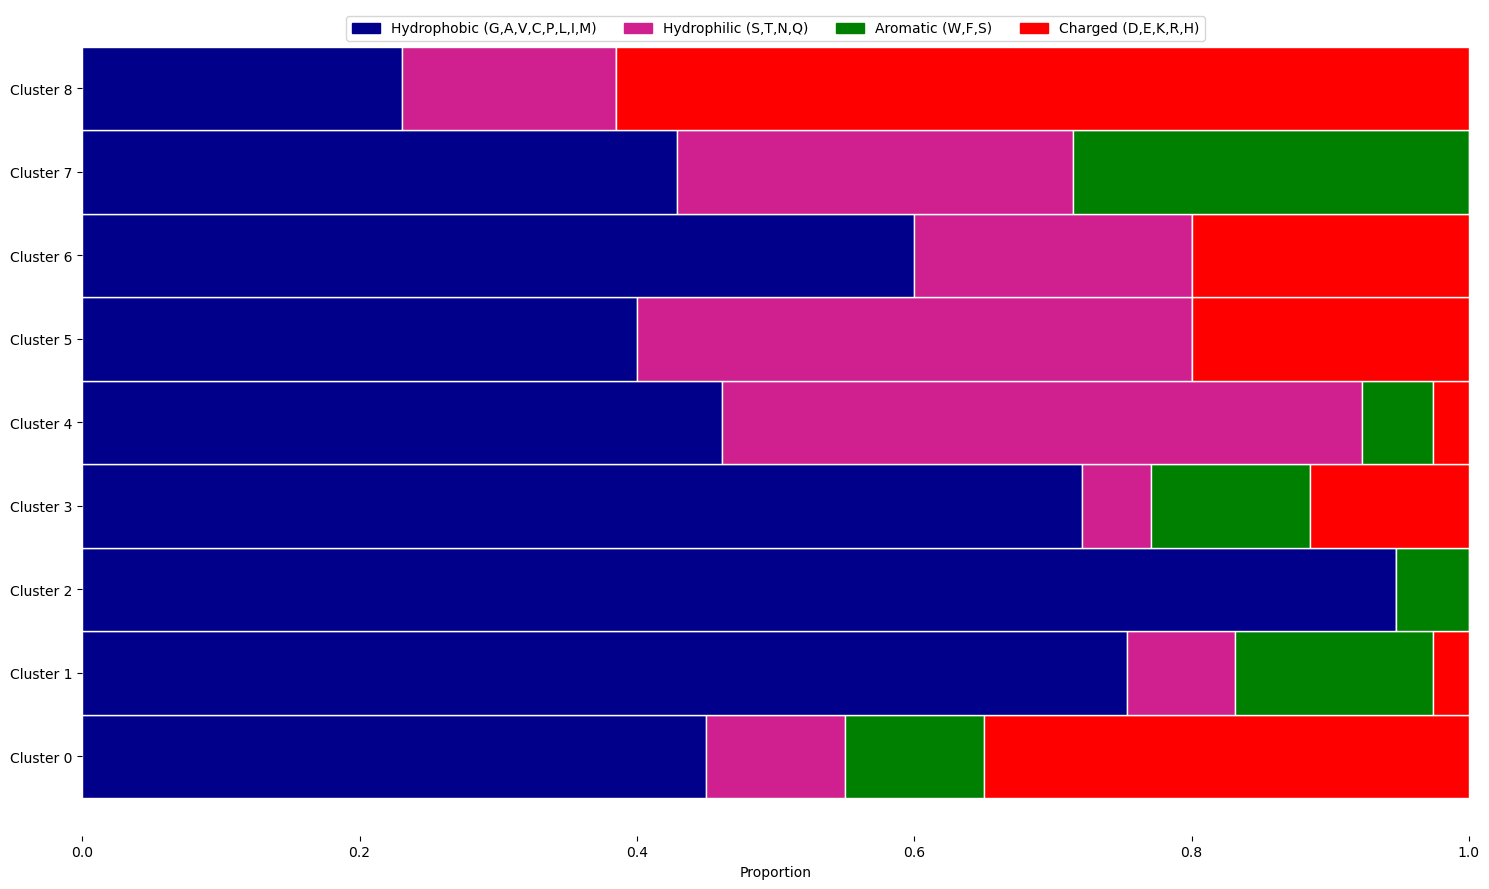

10.968900918960571


gio: file:///mnt/c/Users/camlo/Documents/GitHub/MAGPIE/reference_11.html: No application is registered as handling this file


In [3]:
eps = 2
min_samples = 15
thread_n = 1
target_chain = "B"
binding_chain = "C"
is_ligand = True
distance = 8
download_meta = True
import time

# Calculate the start time
start = time.time()
print(pdb_files[0])
# Code here
# Calculate the end time and time taken
residues_found, target_chain = sequence_logo_main.main(pdb_files, target_chain,binding_chain,is_ligand, distance,download_meta,[eps,min_samples], thread_n)
end = time.time()


# Show the results : this can be altered however you like
print(end - start)

 # **4. Select target ligand residues or heavy atoms to generate AA frequency graphs.**
Enter the target residue indices or heavy atom names to graph. These should be separated by commas, without spaces (e.g., N1A,N3A,N9A). Ranges are allowed when working with protein-protein interactions (e.g. 24-26,27,28-50).

If there are no residues within the given range, the next cell will not throw a message and an error. 

In [ ]:
import helper_functions 
sequence_logo_targets = input("Residues to graph: ")



## **6.  Generate AA frequency graphs.**
Indicate whether you'd like to only see the combined AA frequency graph.

No AA within 8 Å of target id: L132
No AA within 8 Å of target id: K133
No AA within 8 Å of target id: P134
No AA within 8 Å of target id: F135


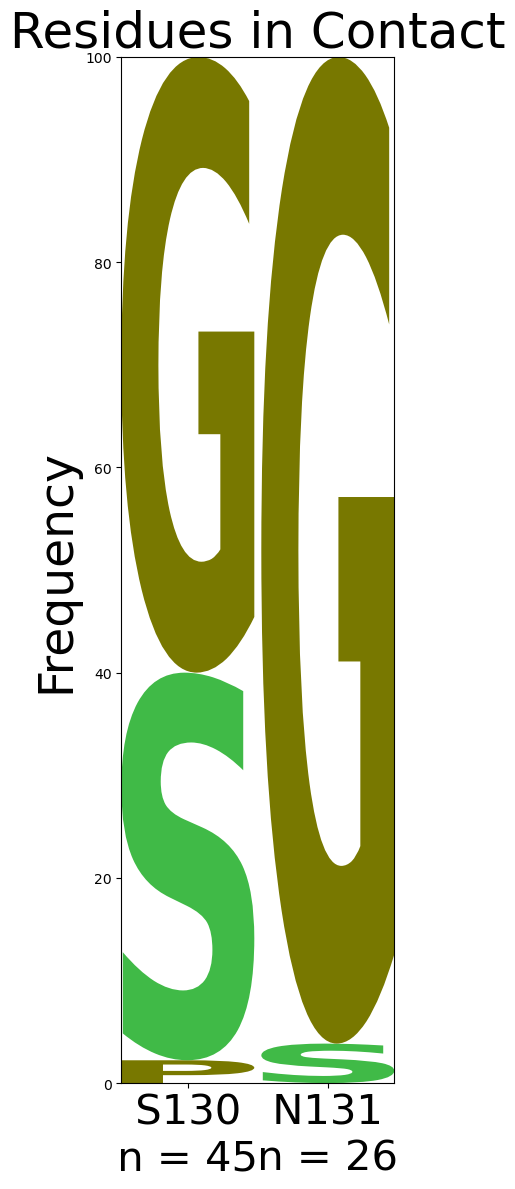

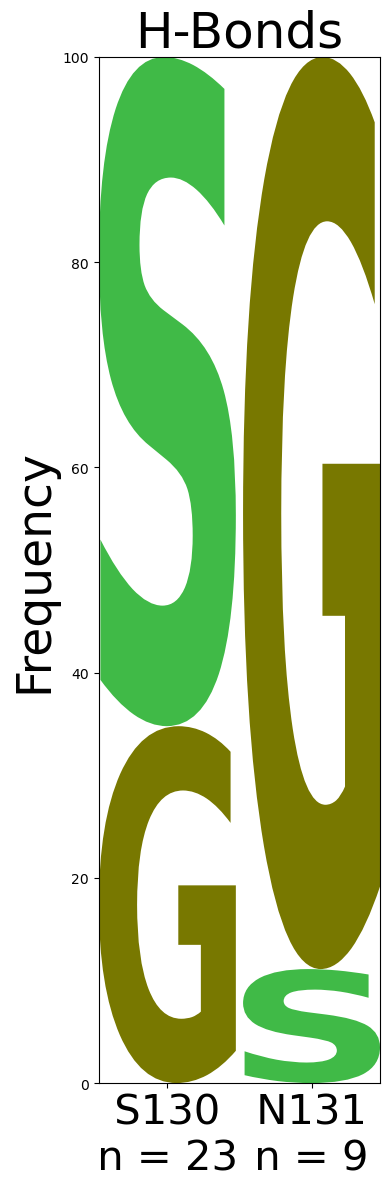

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plot_list = helper_functions.process_residues_to_graph(sequence_logo_targets,is_ligand)
combined = input("Only combined logo? (True or False): ")
if combined == 'True':
    combined = True
else: 
    combined = False
sequence_logo_main.sequence_logos(residues_found, target_chain, plot_list, is_ligand,combined, distance)
